COMPONENTE 1 - DATA FETCHING 

In [ ]:
!pip install config
!pip install stop_words

In [ ]:
from config import *
import tweepy
import datetime
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words

In [3]:
TWITTER_CONSUMER_KEY = 'e27sd02R39EIsSHfrTUCiOwXT'
TWITTER_CONSUMER_SECRET = 'X0K7qJC7lZ9An1NXWJ3yYijOp4tAFPWcd3OjcBP15djPe9m5KZ'
TWITTER_ACCESS_TOKEN = '175984347-MCv5cbRKRBxXOFKDUfsQVtGhuPy42aRDn53UWP4L'
TWITTER_ACCESS_TOKEN_SECRET = 'XMEe25XGwoeozruLf9Y1zK5wYlTup9U0xLHLG4BT3JffE'

In [4]:
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

INPUT

In [33]:
keyword = input("Ingrese la palabra clave o el hashtag que desea obtener:  ")
cant_tweets = int(input("Ingrese cuantos tweets desea obtener: "))

sent_tweets = tweepy.Cursor(api.search, q=keyword, lang='es').items(cant_tweets)
tweet_list = [[tweet.text, tweet.user.screen_name, tweet.created_at, tweet.retweet_count, tweet.favorite_count] for tweet in sent_tweets]

#DataFrame
tweet_df = pd.DataFrame(tweet_list)
tweet_df.columns = [ "Tweet", "Usuario", "Fecha", "RTs", "Favs"]
tweet_df.to_csv("Tweets_" + keyword + ".csv")


Ingrese la palabra clave o el hashtag que desea obtener:  Putin
Ingrese cuantos tweets desea obtener: 500


COMOPONENTE 2 - ANALISIS DE SENTIMIENTO 

In [34]:
tweets_a_list = pd.read_csv("Tweets_" + keyword + ".csv")
tweets_positivos = 0
tweets_negativos = 0
tweets_neutros = 0

In [35]:
def cleanTxt(text):
  text = re.sub('é', 'e', text)
  text = re.sub('á', 'a', text)
  text = re.sub('í', 'i', text)
  text = re.sub('ó', 'o', text)
  text = re.sub('ú', 'u', text)
  text = re.sub('\B\@([\w\-]+):', '', text) #Removing @mentions
  text = re.sub('#', '', text) # Removing '#' hash tag
  text = re.sub('RT[\s]+', '', text) # Removing RT
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  text = re.sub("\n",'',text)
  return text.lower()


# Clean the tweets
tweets_a_list['Tweet'] = tweets_a_list['Tweet'].apply(cleanTxt)

# Show the cleaned tweets
tweets_a_list

,Unnamed: 0,Tweet,Usuario,Fecha,RTs,Favs
0,0,putin felicito al nuevo presidente de colombi...,LuisAlb85178632,2022-06-20 16:27:43,81,0
1,1,"bloomberg: putin puede ganar en ucrania, pero ...",LuisEdu72157488,2022-06-20 16:27:40,5,0
2,2,la periodista alemana alina lipp se enfrenta a...,AdriYag95,2022-06-20 16:27:37,1654,0
3,3,y maduro regresa a venezuela 18jun22 sin haber...,Malelena,2022-06-20 16:27:36,15,0
4,4,"@olhadekyiv el ella se cargaria a putin, segur...",mlorenzofo,2022-06-20 16:27:30,0,0
...,...,...,...,...,...,...
495,495,🔴 zelenski preve que los ataques de rusia se i...,nvonacionalista,2022-06-20 15:38:14,15,0
496,496,@jaumerosellllor @carlosfc83 @romister @vox_es...,Pinxaor,2022-06-20 15:38:13,1,1
497,497,"putin: ""la ue perdio su soberania politica y s...",pacas_ludwin,2022-06-20 15:38:09,505,0
498,498,@lucasfriedmanjr van varios meses y sigo sin e...,DonBlinders,2022-06-20 15:38:04,1,7


In [36]:
##Quitar los emojis ....
def remove_emojis(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', text)
tweets_a_list["Tweet"] = tweets_a_list["Tweet"].apply(remove_emojis)
tweets_a_list

,Unnamed: 0,Tweet,Usuario,Fecha,RTs,Favs
0,0,putin felicito al nuevo presidente de colombi...,LuisAlb85178632,2022-06-20 16:27:43,81,0
1,1,"bloomberg: putin puede ganar en ucrania, pero ...",LuisEdu72157488,2022-06-20 16:27:40,5,0
2,2,la periodista alemana alina lipp se enfrenta a...,AdriYag95,2022-06-20 16:27:37,1654,0
3,3,y maduro regresa a venezuela 18jun22 sin haber...,Malelena,2022-06-20 16:27:36,15,0
4,4,"@olhadekyiv el ella se cargaria a putin, seguro.",mlorenzofo,2022-06-20 16:27:30,0,0
...,...,...,...,...,...,...
495,495,zelenski preve que los ataques de rusia se in...,nvonacionalista,2022-06-20 15:38:14,15,0
496,496,@jaumerosellllor @carlosfc83 @romister @vox_es...,Pinxaor,2022-06-20 15:38:13,1,1
497,497,"putin: ""la ue perdio su soberania politica y s...",pacas_ludwin,2022-06-20 15:38:09,505,0
498,498,@lucasfriedmanjr van varios meses y sigo sin e...,DonBlinders,2022-06-20 15:38:04,1,7


In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

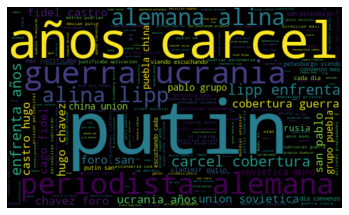

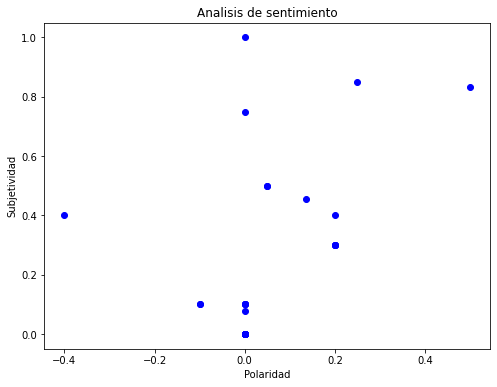

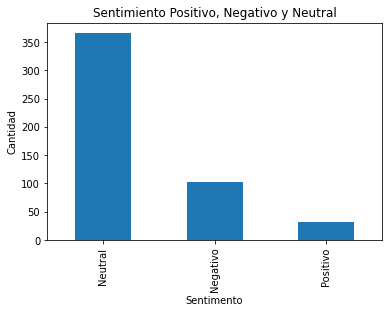

In [38]:
tweets_a_list[['Polaridad', 'Subjetividad']] = tweets_a_list['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweets_a_list['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tweets_a_list.loc[index, 'Sentimiento'] = "Negativo"
    elif pos > neg:
        tweets_a_list.loc[index, 'Sentimiento'] = "Positivo"
    else:
        tweets_a_list.loc[index, 'Sentimiento'] = "Neutral"
    tweets_a_list.loc[index, 'Negativo'] = neg
    tweets_a_list.loc[index, 'Neutral'] = neu
    tweets_a_list.loc[index, 'Positivo'] = pos
    tweets_a_list.loc[index, 'Compuesto'] = comp
  
for index, row in tweets_a_list['Compuesto'].iteritems():
  if row > 0:
    tweets_positivos +=1
  elif row < 0:
    tweets_negativos +=1
  else:
    tweets_neutros +=1

def porcentaje(valor, cantidad_total):
  return (valor/cantidad_total*100)

porce_tweets_positivos = porcentaje(tweets_positivos, cant_tweets)
porce_tweets_negativos = porcentaje(tweets_negativos, cant_tweets)
porce_tweets_neutros = porcentaje(tweets_neutros, cant_tweets)

tweets_a_list.to_csv("Analisis_de_" + keyword + ".csv")

palabras_irrelevantes = get_stop_words('spanish')
allWords = ' '.join([twts for twts in tweets_a_list['Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, stopwords = palabras_irrelevantes).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

plt.figure(figsize=(8,6)) 
for i in range(0, tweets_a_list.shape[0]):
  plt.scatter(tweets_a_list['Polaridad'][i], tweets_a_list['Subjetividad'][i], color='Blue') 

# plt.scatter(x,y,color)   
plt.title('Analisis de sentimiento') 
plt.xlabel('Polaridad') 
plt.ylabel('Subjetividad') 
plt.show()

plt.title('Sentimiento Positivo, Negativo y Neutral')
plt.xlabel('Sentimento')
plt.ylabel('Cantidad')
tweets_a_list['Sentimiento'].value_counts().plot(kind = 'bar')
plt.show()